# 本 ipynb 目標
> 把特徵除理好存成 excel(或是csv)

[刪除output](https://www.codegrepper.com/code-examples/python/how+to+clear+output+in+jupyter+notebook)

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from IPython.display import clear_output

# import 之前寫的東西 -> import_ipynb 可以用
import import_ipynb
import feature_extraction_function 

clear_output(wait= False)


In [4]:
os.getcwd()

'c:\\Users\\BOIL_PO\\Desktop\\[自練] 清彥上manual'

In [5]:
# 看濾波完的東西，
all_filtered_csv = glob.glob('Filtered/*.csv')
all_filtered_csv[:5]

['Filtered\\F_Aak.csv',
 'Filtered\\F_Amiya.csv',
 'Filtered\\F_April.csv',
 'Filtered\\F_Archetto.csv',
 'Filtered\\F_Ash.csv']

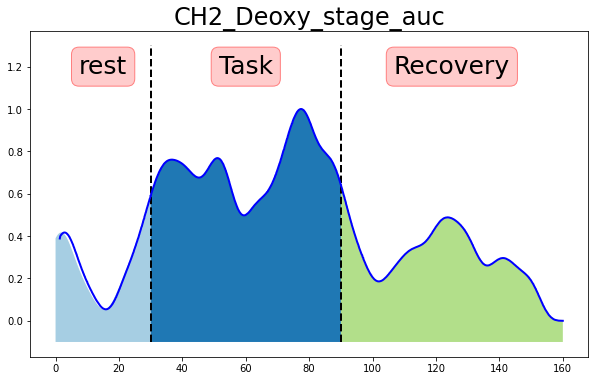

[0.43877957881849705, 28.19885142368155, 7.3425084767761915, 7.341136247698376, 11.391762713553224, 8.632285199978986, 29.8319638467578, 30.099611572237333, 25.092159057751445, 43.540750901324266, 40.47433926378794, 32.82676294416084, 16.732716592669384, 53.206043490772686, 37.746735347349116, 20.726629402896354, 25.285574012215736, 19.758182657695478] ['CH1_Oxy_rest_auc', 'CH1_Deoxy_rest_auc', 'CH2_Oxy_rest_auc', 'CH2_Deoxy_rest_auc', 'CH3_Oxy_rest_auc', 'CH3_Deoxy_rest_auc', 'CH1_Oxy_Task_auc', 'CH1_Deoxy_Task_auc', 'CH2_Oxy_Task_auc', 'CH2_Deoxy_Task_auc', 'CH3_Oxy_Task_auc', 'CH3_Deoxy_Task_auc', 'CH1_Oxy_recovery_auc', 'CH1_Deoxy_recovery_auc', 'CH2_Oxy_recovery_auc', 'CH2_Deoxy_recovery_auc', 'CH3_Oxy_recovery_auc', 'CH3_Deoxy_recovery_auc']


In [6]:
df = pd.read_csv(all_filtered_csv[1])
df = df.drop(columns= ['Time_Arduino', 'easingdata'])
df = df.set_index('Time_Host')

if __name__ == "__main__":
    value, ind = feature_extraction_function.stage_auc(df, plot= True, use_col= 3)#

print(value, ind)

In [7]:
# 看有啥函數能用
# dir(Extraction)

In [8]:
df_all = pd.DataFrame()

# 沒錯就這樣，因為函數寫在隔壁了
for files in all_filtered_csv:

    temp_value = []
    temp_ind = []

    people = files.split('\\')[-1].split('.')[0].split('_')[-1]

    # 讀取檔案
    df = pd.read_csv(files)
    df = df.drop(columns= ['Time_Arduino', 'easingdata'])
    df = df.set_index('Time_Host')

    # 一種一個的加
    value1, index1 = feature_extraction_function.stage_begin_slope(df)
    temp_value += value1; temp_ind += index1

    value2, index2 = feature_extraction_function.stage_mean(df)
    temp_value += value2; temp_ind += index2

    value3, index3 = feature_extraction_function.stage_mean_diff(df)
    temp_value += value3; temp_ind += index3

    value4, index4 = feature_extraction_function.stage_acivation(df)
    temp_value += value4; temp_ind += index4

    value5, index5 = feature_extraction_function.stage_std(df)
    temp_value += value5; temp_ind += index5

    value6, index6 = feature_extraction_function.stage_begin_slope_diff(df)
    temp_value += list(value6); temp_ind += index6

    value7, index7 = feature_extraction_function.stage_skew(df)
    temp_value += value7; temp_ind += index7

    value8, index8 = feature_extraction_function.stage_kurtosis(df)
    temp_value += value8; temp_ind += index8

    value9, index9 = feature_extraction_function.stage_auc(df)
    temp_value += value9; temp_ind += index9



    temp_ind, temp_value
    df_all[people] = temp_value

df_all.index = temp_ind


In [9]:
Features = df_all.T
Features.head()

,CH1_Oxy_Task_begin_slope,CH1_Deoxy_Task_begin_slope,CH2_Oxy_Task_begin_slope,CH2_Deoxy_Task_begin_slope,CH3_Oxy_Task_begin_slope,CH3_Deoxy_Task_begin_slope,CH1_Oxy_Recovery_begin_slope,CH1_Deoxy_Recovery_begin_slope,CH2_Oxy_Recovery_begin_slope,CH2_Deoxy_Recovery_begin_slope,...,CH2_Oxy_Task_auc,CH2_Deoxy_Task_auc,CH3_Oxy_Task_auc,CH3_Deoxy_Task_auc,CH1_Oxy_recovery_auc,CH1_Deoxy_recovery_auc,CH2_Oxy_recovery_auc,CH2_Deoxy_recovery_auc,CH3_Oxy_recovery_auc,CH3_Deoxy_recovery_auc
Aak,0.024819,-0.013657,0.011554,-0.009824,0.012998,-0.020968,0.022015,-0.047618,0.057992,0.007034,...,24.697008,7.841043,28.690798,8.986307,42.479873,27.319602,45.187172,40.581406,38.931958,40.268678
Amiya,0.035790,-0.035772,-0.006235,0.020678,0.020728,0.019056,-0.031904,0.031897,-0.026799,-0.047282,...,25.092159,43.540751,40.474339,32.826763,16.732717,53.206043,37.746735,20.726629,25.285574,19.758183
April,0.019041,-0.044347,-0.012907,-0.014942,0.014461,-0.013636,-0.008208,0.014011,-0.010022,-0.009350,...,41.735822,35.805988,40.129903,29.712021,48.940332,20.251212,24.393253,21.443065,35.942811,9.212714
Archetto,0.016882,-0.028790,0.011429,-0.035307,0.004710,-0.004605,-0.031117,0.006936,-0.045191,-0.013461,...,38.966250,18.055291,40.556234,53.948192,28.317373,26.770196,17.789030,18.595471,29.037015,60.142187
Ash,0.068736,0.065589,0.057870,-0.034063,0.048478,-0.021619,0.010310,0.006476,0.007697,0.004553,...,37.383177,36.930905,45.768849,11.007298,54.844055,56.742961,53.634961,36.871146,52.210077,47.997299


In [11]:
Features.to_excel('Features.xlsx')